In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드
df_1 = pd.read_csv("modified_h4_summary.csv")
df_2 = pd.read_csv("modified_h4_summary_2.csv")

# 스타일 설정
sns.set(style="whitegrid")

In [63]:
df_1 = df_1[df_1['case'].isin([2, 6])].sort_values(by=['case'])
df_2 = df_2[df_2['case'].isin(['lz4', 'zstd', 'snappy'])]
df = pd.concat([df_1, df_2], ignore_index=True)
df

,work,hot,cold,trial,time(s),hot_column_key,default_column_key,rocksdb.flush.write.bytes,rocksdb.compact.write.bytes,rocksdb.bytes.written,...,write.COUNT,write.SUM,write.AVG,WAF,RAF,cache_hit_ratio,memtable_hit_ratio,throughput,compression_ratio,case
0,write,LZ4,ZSTD,2,207.475,0,250001,97793434,473493367,16407310989,...,1000000,206043462,206.043462,0.034819,4.068118,0.435924,0.002090,7.908091e+07,0.577565,2
1,read,LZ4,ZSTD,2,13.210,679338,0,0,303849,0,...,0,0,0.000000,0.000000,1.293348,0.360654,0.000000,0.000000e+00,0.456279,2
2,write,LZ4,ZSTD,1,302.003,0,249872,97813333,473931150,16407310892,...,1000000,300545816,300.545816,0.034847,4.067873,0.495435,0.003784,5.432830e+07,0.577618,2
3,read,LZ4,ZSTD,3,12.914,680621,0,0,256919,0,...,0,0,0.000000,0.000000,1.291659,0.370651,0.000000,0.000000e+00,0.380370,2
4,write,LZ4,ZSTD,3,236.236,0,250615,97797195,474219095,16407310467,...,1000000,234779240,234.779240,0.034864,4.062192,0.437008,0.002091,6.945305e+07,0.577661,2
5,read,LZ4,ZSTD,1,17.474,679087,0,0,314149,0,...,0,0,0.000000,0.000000,1.294637,0.312229,0.000000,0.000000e+00,0.473160,2
6,read,Snappy,ZSTD,1,11.830,678638,0,0,853594,0,...,0,0,0.000000,0.000000,1.294552,0.485481,0.000000,0.000000e+00,1.343993,6
7,write,Snappy,ZSTD,3,226.802,0,250171,579075930,3064465116,16407311368,...,1000000,225267342,225.267342,0.222068,4.065089,0.467906,0.002090,7.234200e+07,3.763660,6
8,write,Snappy,ZSTD,1,220.586,0,250473,578996990,3066341831,16407311889,...,1000000,219062894,219.062894,0.222178,4.064230,0.403208,0.002088,7.438057e+07,3.714542,6
9,read,Snappy,ZSTD,2,15.059,678757,0,0,628342,0,...,0,0,0.000000,0.000000,1.293032,0.385307,0.000000,0.000000e+00,0.978544,6


In [64]:
# 작업 유형별로 필터링
df_read = df[df['work'] == 'read']
df_write = df[df['work'] == 'write']

In [91]:
df_write_avg = df_write.groupby('case').mean(numeric_only=True).reset_index()
df_write_avg

,case,trial,time(s),hot_column_key,default_column_key,rocksdb.flush.write.bytes,rocksdb.compact.write.bytes,rocksdb.bytes.written,rocksdb.number.keys.read,rocksdb.bytes.read,...,write.P100,write.COUNT,write.SUM,write.AVG,WAF,RAF,cache_hit_ratio,memtable_hit_ratio,throughput,compression_ratio
0,2,2.0,248.571333,0.0,250162.666667,9.780132e+07,4.738812e+08,1.640731e+10,1.805998e+06,7.277188e+09,...,4.151452e+06,1000000.0,2.471228e+08,247.122839,0.034843,4.066061,0.456122,0.002655,6.762075e+07,0.577615
1,6,2.0,209.190667,0.0,250459.666667,5.790198e+08,3.064453e+09,1.640731e+10,1.805978e+06,7.282388e+09,...,3.874872e+06,1000000.0,2.077029e+08,207.702908,0.222064,4.063111,0.443866,0.002090,7.926041e+07,3.778588
2,lz4,2.0,239.761000,0.0,250467.000000,1.144076e+08,5.263624e+08,1.640731e+10,1.806038e+06,7.281519e+09,...,3.979589e+06,1000000.0,2.382509e+08,238.250894,0.039054,4.063732,0.483252,0.002824,7.284414e+07,0.658823
3,snappy,2.0,243.553333,0.0,250091.333333,8.038434e+08,3.897375e+09,1.640731e+10,1.806054e+06,7.275102e+09,...,4.369228e+06,1000000.0,2.420412e+08,242.041225,0.286532,4.067352,0.493549,0.002492,6.798634e+07,4.929582
4,zstd,2.0,198.049000,0.0,250197.000000,5.910408e+07,2.663825e+08,1.640731e+10,1.806074e+06,7.276511e+09,...,2.944509e+06,1000000.0,1.965329e+08,196.532892,0.019838,4.066608,0.439228,0.002091,8.320999e+07,0.315487


In [66]:
df_read_avg = df_read.groupby('case').mean(numeric_only=True).reset_index()
df_read_avg

,case,trial,time(s),hot_column_key,default_column_key,rocksdb.flush.write.bytes,rocksdb.compact.write.bytes,rocksdb.bytes.written,rocksdb.number.keys.read,rocksdb.bytes.read,...,write.P100,write.COUNT,write.SUM,write.AVG,WAF,RAF,cache_hit_ratio,memtable_hit_ratio,throughput,compression_ratio
0,2,2.0,14.532667,679682.000000,0.0,0.0,2.916390e+05,0.0,1000000.0,1.266921e+10,...,0.0,0.0,0.0,0.0,0.0,1.293215,0.347845,0.0,0.0,0.436603
1,6,2.0,13.962000,678754.666667,0.0,0.0,8.823120e+05,0.0,1000000.0,1.266208e+10,...,0.0,0.0,0.0,0.0,0.0,1.293942,0.408810,0.0,0.0,1.389223
2,lz4,2.0,13.228000,678827.000000,0.0,0.0,7.816750e+06,0.0,1000000.0,1.266248e+10,...,0.0,0.0,0.0,0.0,0.0,1.293901,0.276340,0.0,0.0,0.669775
3,snappy,2.0,19.415333,678956.333333,0.0,0.0,5.820208e+06,0.0,1000000.0,1.265951e+10,...,0.0,0.0,0.0,0.0,0.0,1.294206,0.337983,0.0,0.0,4.951093
4,zstd,2.0,13.383500,678565.000000,0.0,0.0,2.294020e+05,0.0,1000000.0,1.265263e+10,...,0.0,0.0,0.0,0.0,0.0,1.294909,0.362556,0.0,0.0,0.336015


### Write

/tmp/ipykernel_1108/2432649000.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='case', y='WAF', data=df_write, palette='Set2', legend=False)


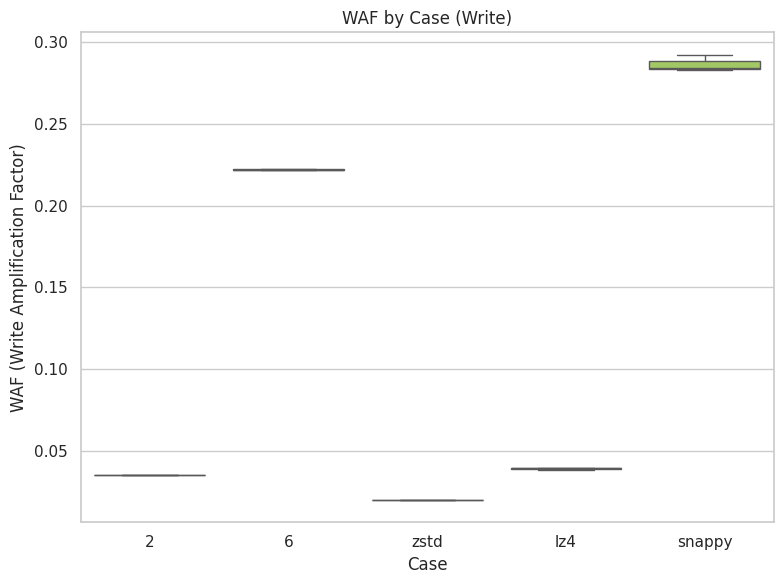

In [67]:
# Write 작업의 WAF
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='WAF', data=df_write, palette='Set2', legend=False)
plt.title('WAF by Case (Write)')
plt.xlabel('Case')
plt.ylabel('WAF (Write Amplification Factor)')

plt.tight_layout()
plt.show()

/tmp/ipykernel_1108/205539061.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='WAF', data=df_write_avg, palette='Set2')


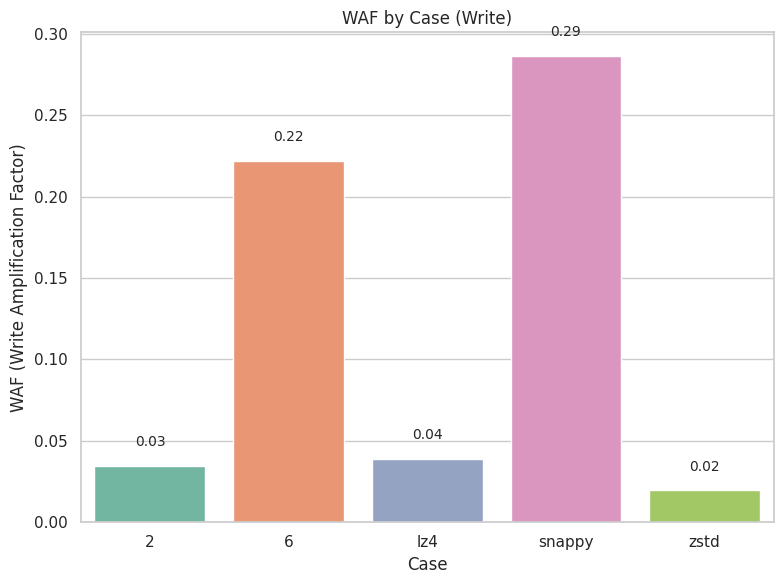

In [68]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='WAF', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('WAF by Case (Write)')
plt.xlabel('Case')
plt.ylabel('WAF (Write Amplification Factor)')
plt.tight_layout()
plt.show()

In [69]:
df_write.groupby('case')['WAF'].describe()

,count,mean,std,min,25%,50%,75%,max
case,,,,,,,,
2,3.0,0.034843,0.000022,0.034819,0.034833,0.034847,0.034855,0.034864
6,3.0,0.222064,0.000116,0.221946,0.222007,0.222068,0.222123,0.222178
lz4,3.0,0.039054,0.000770,0.038165,0.038828,0.039490,0.039498,0.039506
snappy,3.0,0.286532,0.005129,0.283075,0.283585,0.284096,0.288261,0.292425
zstd,3.0,0.019838,0.000005,0.019833,0.019836,0.019839,0.019840,0.019842


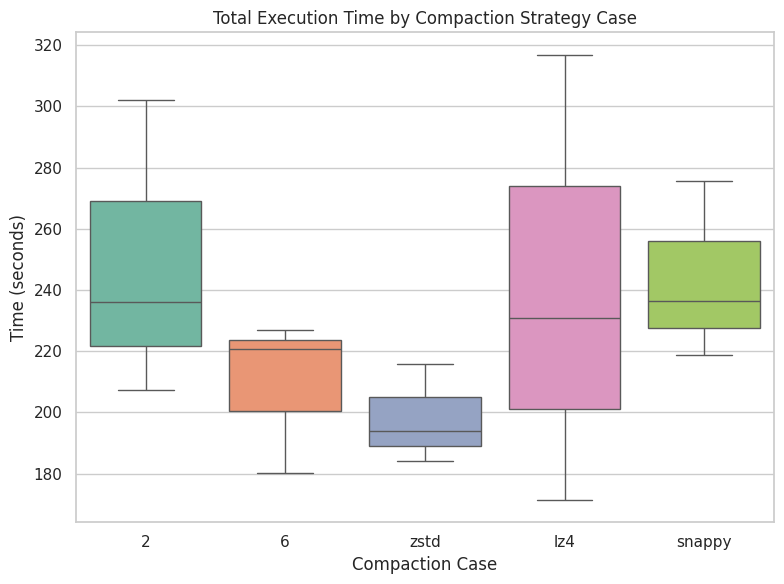

In [70]:
# 총 소요시간 
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='time(s)', data=df_write, hue='case', palette='Set2', legend=False)
plt.title('Total Execution Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

/tmp/ipykernel_1108/1952208775.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='time(s)', data=df_write_avg, palette='Set2')


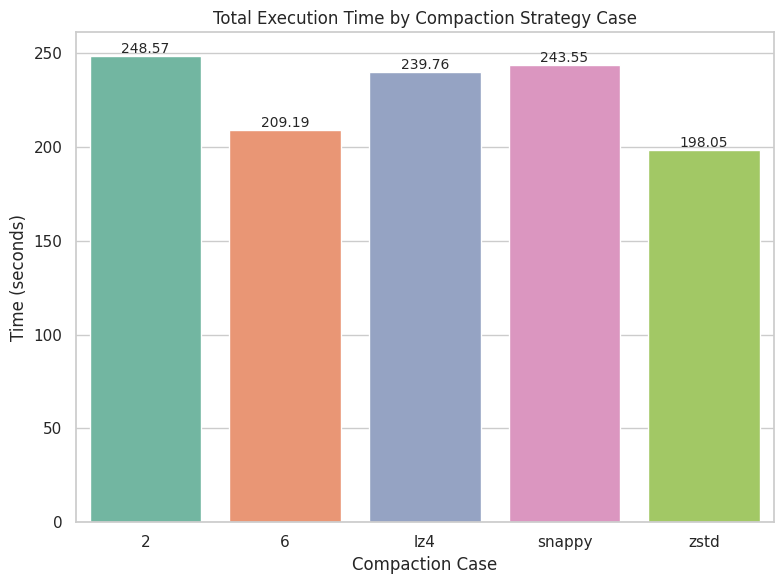

In [71]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='time(s)', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Total Execution Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

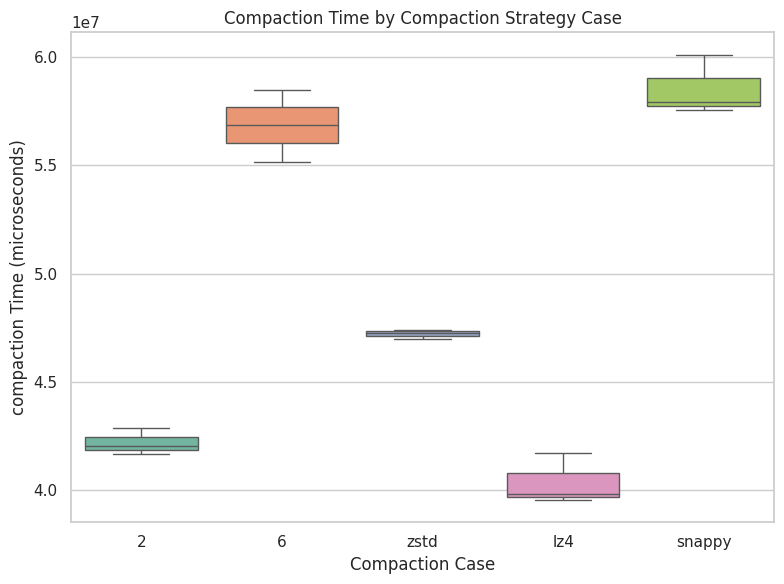

In [72]:
# 총 소요시간 
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='rocksdb.compaction.total.time.cpu_micros', data=df_write, hue='case', palette='Set2', legend=False)
plt.title('Compaction Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('compaction Time (microseconds)')
plt.tight_layout()
plt.show()

/tmp/ipykernel_1108/1693509766.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='rocksdb.compaction.total.time.cpu_micros', data=df_write_avg, palette='Set2')


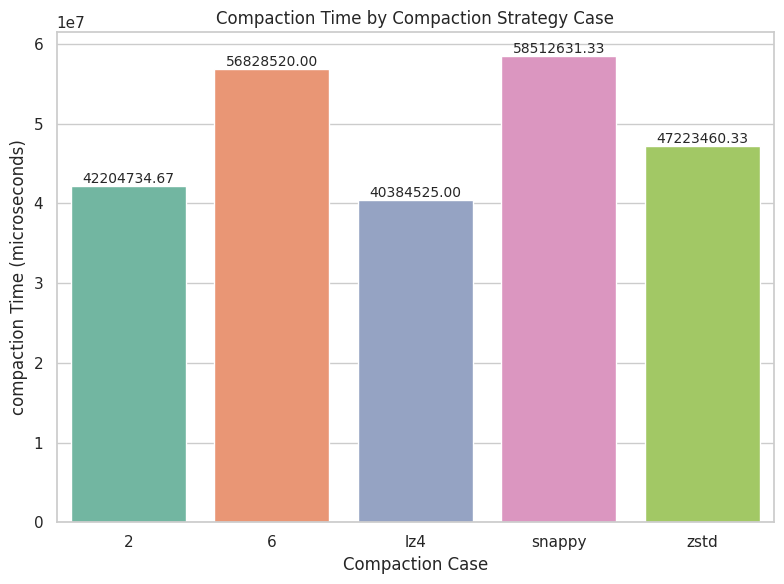

In [73]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='rocksdb.compaction.total.time.cpu_micros', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Compaction Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('compaction Time (microseconds)')
plt.tight_layout()
plt.show()

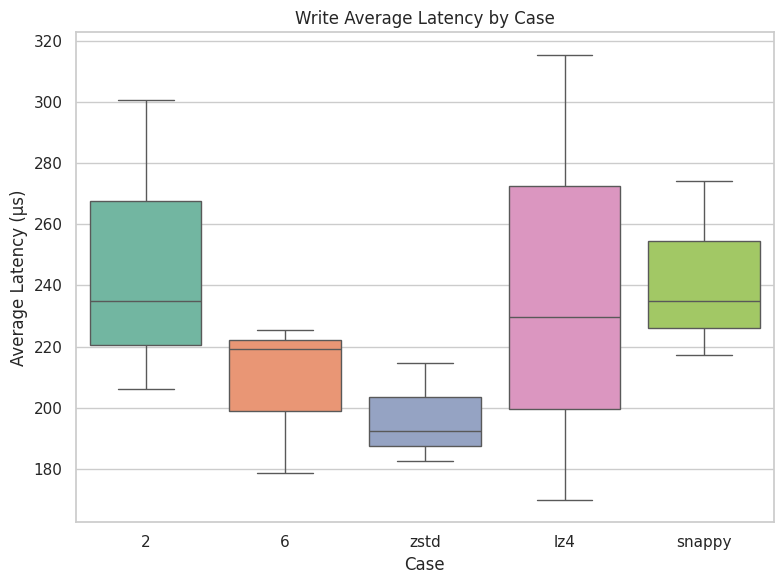

In [74]:
# Write Average Latency by Case
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='write.AVG', data=df_write, hue='case', palette='Set2', legend=False)
plt.title('Write Average Latency by Case')
plt.ylabel('Average Latency (µs)')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

/tmp/ipykernel_1108/2588844532.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='write.AVG', data=df_write_avg, palette='Set2')


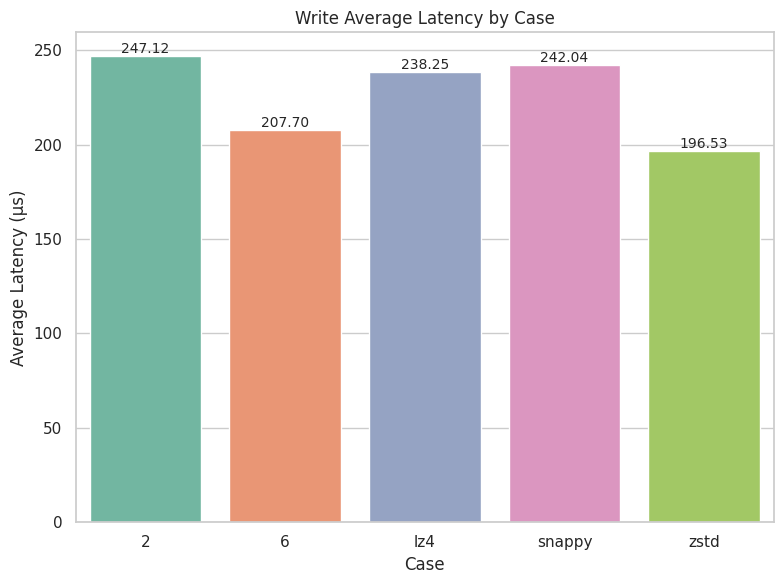

In [75]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='write.AVG', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Write Average Latency by Case')
plt.ylabel('Average Latency (µs)')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

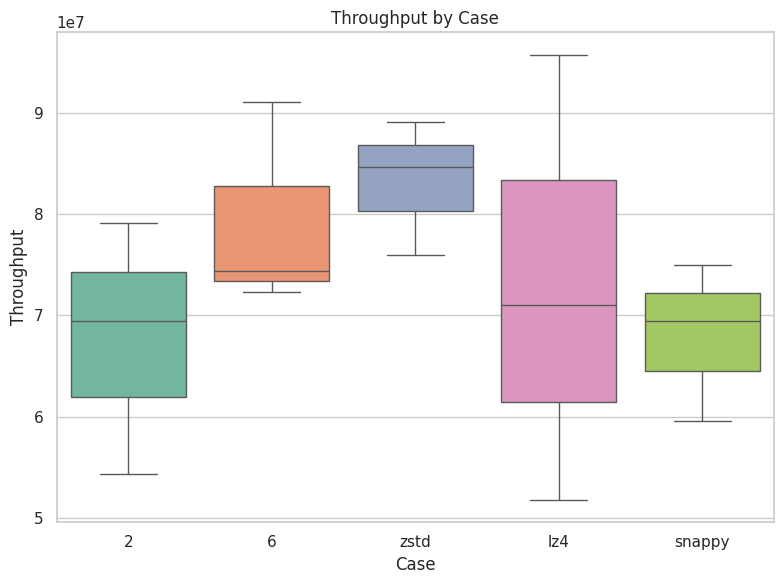

In [76]:
# Throughput
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='throughput', data=df_write, hue='case', palette='Set2', legend=False)
plt.title('Throughput by Case')
plt.ylabel('Throughput')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

/tmp/ipykernel_1108/3585659375.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='throughput', data=df_write_avg, palette='Set2')


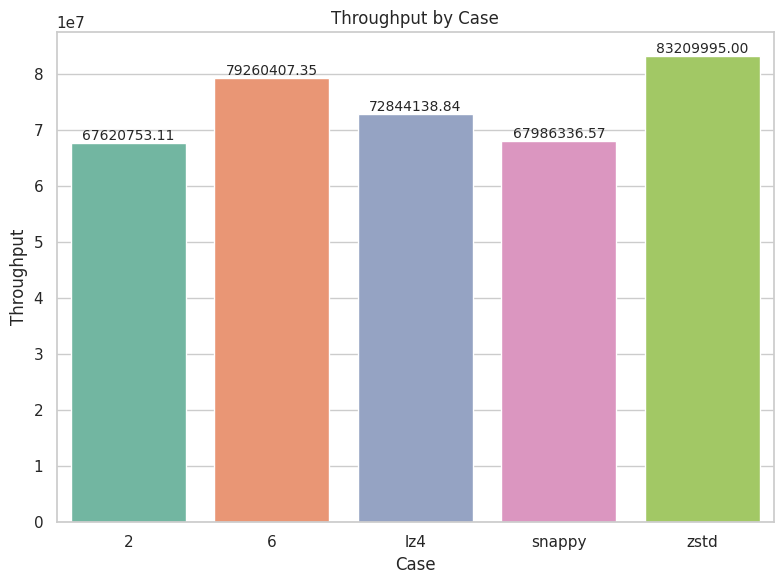

In [77]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='throughput', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Throughput by Case')
plt.ylabel('Throughput')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

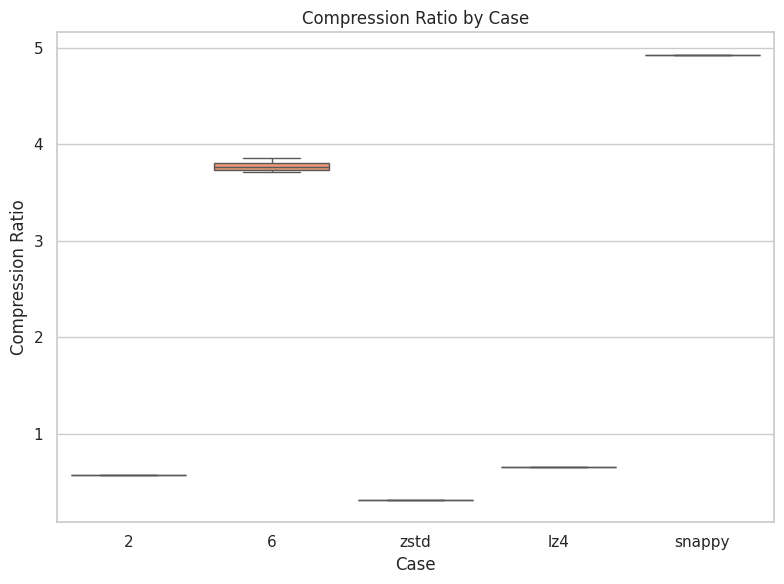

In [78]:
# compression ratio
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='compression_ratio', data=df_write, hue='case', palette='Set2', legend=False)
plt.title('Compression Ratio by Case')
plt.ylabel('Compression Ratio')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

/tmp/ipykernel_1108/1352047339.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='compression_ratio', data=df_write_avg, palette='Set2')


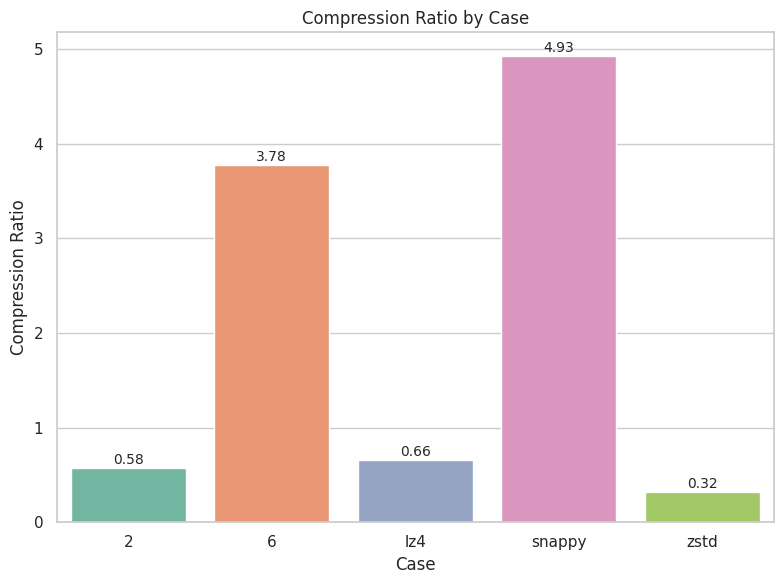

In [79]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='compression_ratio', data=df_write_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Compression Ratio by Case')
plt.ylabel('Compression Ratio')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

### Read

/tmp/ipykernel_1108/1373416525.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='case', y='RAF', data=df_read, palette='Set2', legend=False)


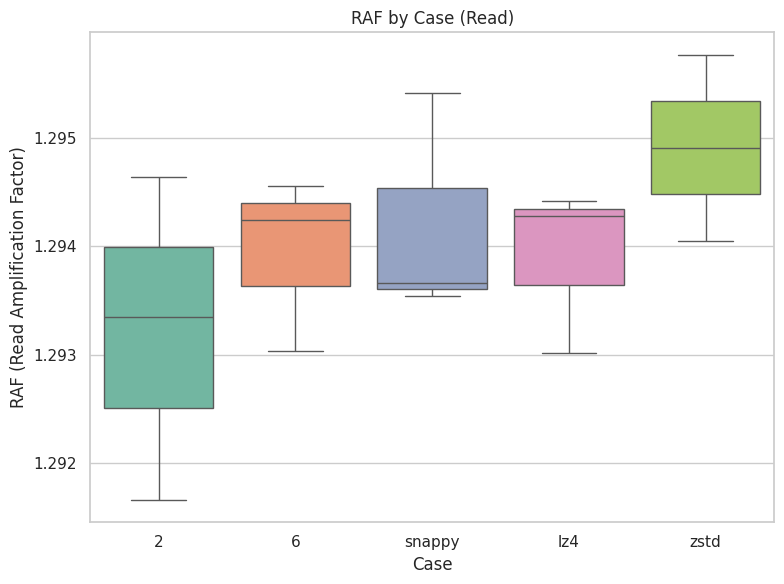

In [80]:
# RAF
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='RAF', data=df_read, palette='Set2', legend=False)
plt.title('RAF by Case (Read)')
plt.xlabel('Case')
plt.ylabel('RAF (Read Amplification Factor)')

plt.tight_layout()
plt.show()

/tmp/ipykernel_1108/2467909650.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='RAF', data=df_read_avg, palette='Set2')


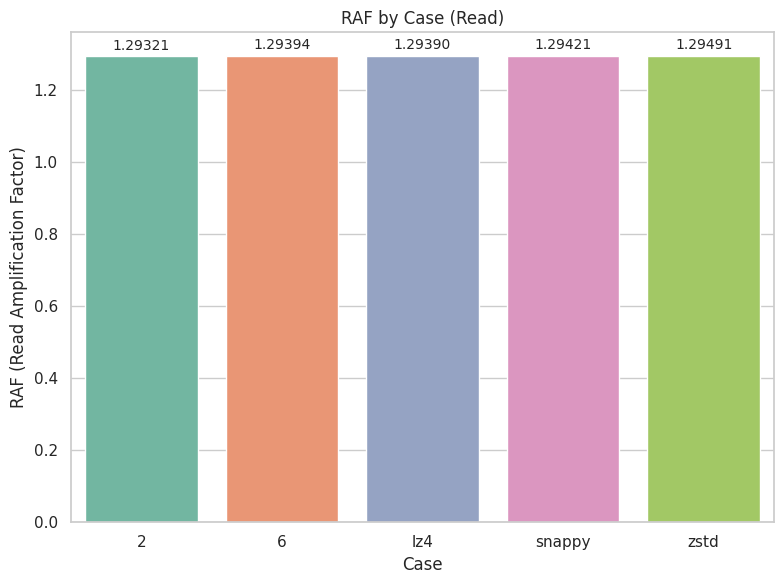

In [81]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='RAF', data=df_read_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.5f}', ha='center', va='bottom', fontsize=10)

plt.title('RAF by Case (Read)')
plt.xlabel('Case')
plt.ylabel('RAF (Read Amplification Factor)')
plt.tight_layout()
plt.show()

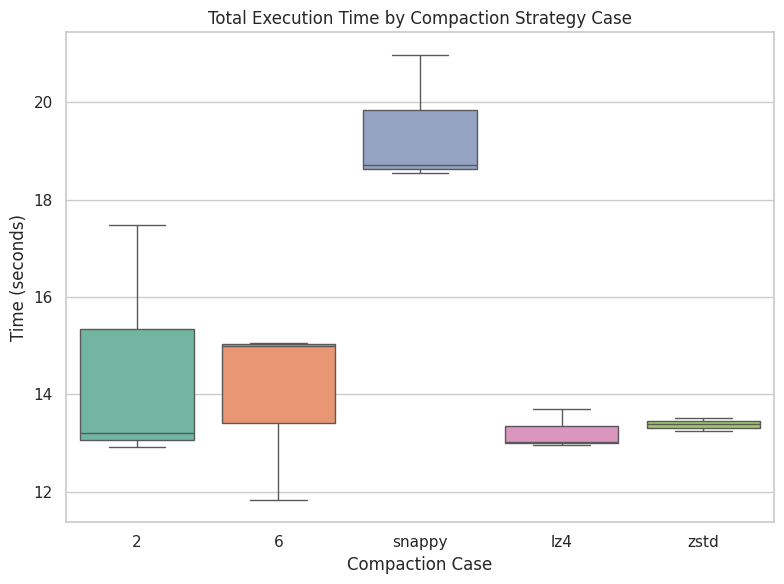

In [82]:
# 총 소요시간 
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='time(s)', data=df_read, hue='case', palette='Set2', legend=False)
plt.title('Total Execution Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

/tmp/ipykernel_1108/2413868267.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='time(s)', data=df_read_avg, palette='Set2')


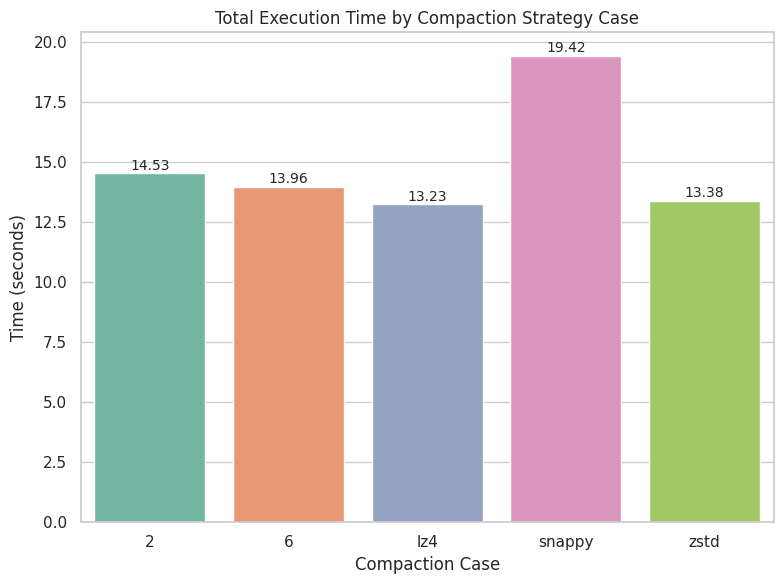

In [83]:

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='time(s)', data=df_read_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Total Execution Time by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Time (seconds)')
plt.tight_layout()
plt.show()

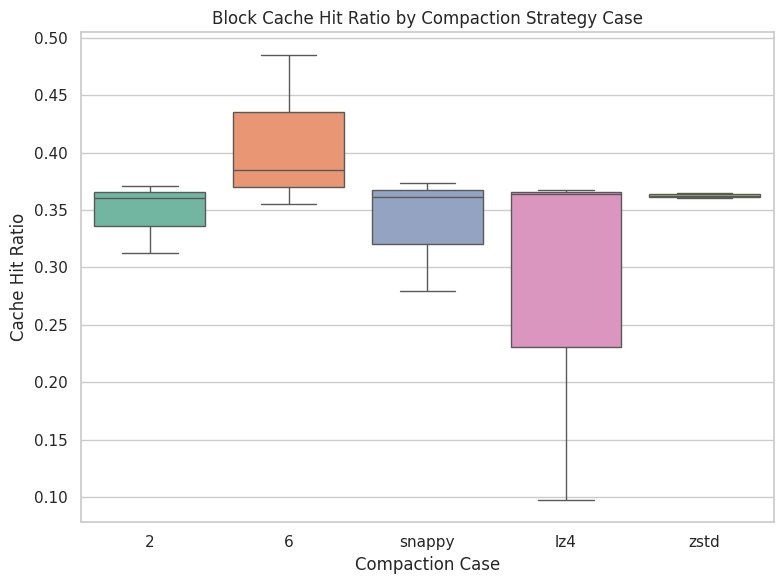

In [84]:
# ------------------------------------
# 3. Block Cache Hit Ratio by Case
# ------------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='cache_hit_ratio', data=df_read, hue='case', palette='Set2', legend=False)
plt.title('Block Cache Hit Ratio by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Cache Hit Ratio')
plt.tight_layout()
plt.show()

/tmp/ipykernel_1108/921772678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='cache_hit_ratio', data=df_read_avg, palette='Set2')


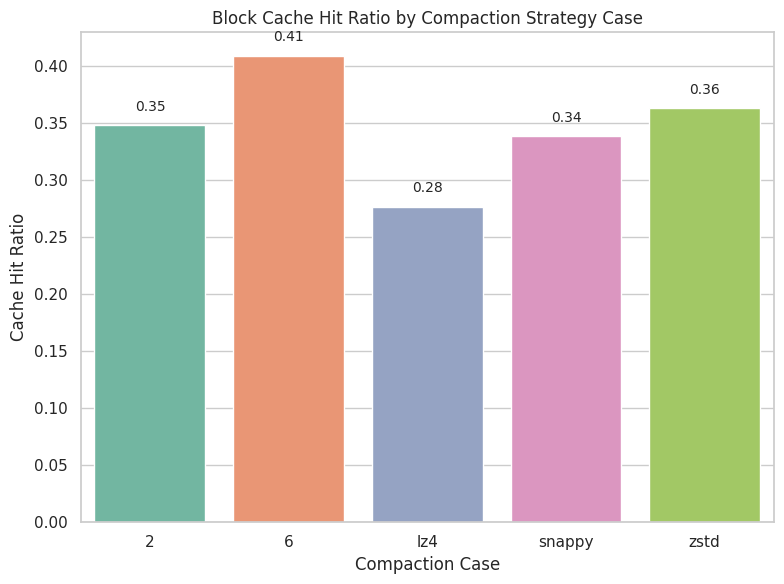

In [85]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='cache_hit_ratio', data=df_read_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Block Cache Hit Ratio by Compaction Strategy Case')
plt.xlabel('Compaction Case')
plt.ylabel('Cache Hit Ratio')
plt.tight_layout()
plt.show()

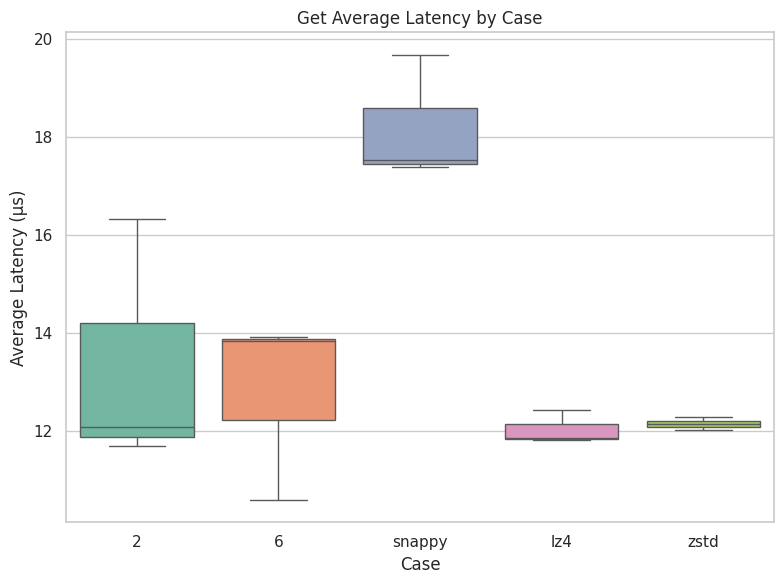

In [86]:
# Latency
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='get.AVG', data=df_read, hue='case', palette='Set2', legend=False)
plt.title('Get Average Latency by Case')
plt.ylabel('Average Latency (µs)')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

/tmp/ipykernel_1108/2039202209.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='get.AVG', data=df_read_avg, palette='Set2')


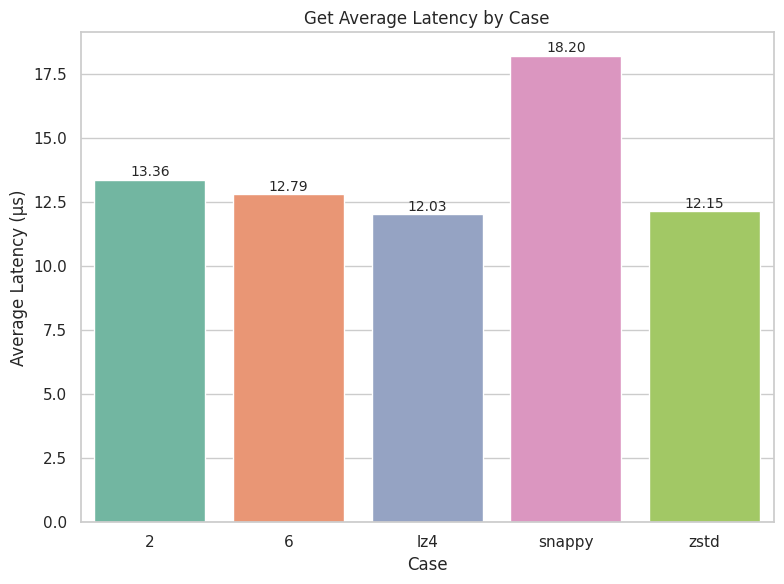

In [87]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='get.AVG', data=df_read_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Get Average Latency by Case')
plt.ylabel('Average Latency (µs)')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

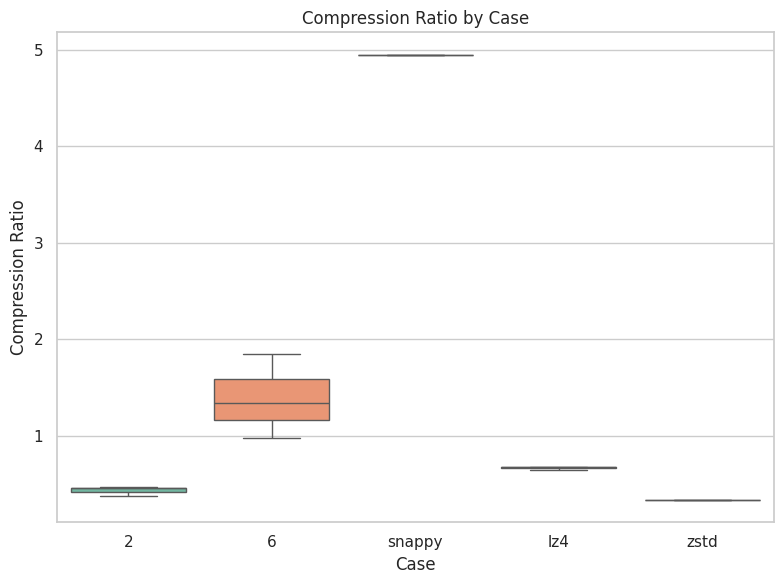

In [88]:
# compression ratio
plt.figure(figsize=(8, 6))
sns.boxplot(x='case', y='compression_ratio', data=df_read, hue='case', palette='Set2', legend=False)
plt.title('Compression Ratio by Case')
plt.ylabel('Compression Ratio')
plt.xlabel('Case')
plt.tight_layout()
plt.show()

/tmp/ipykernel_1108/1598831252.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='case', y='compression_ratio', data=df_read_avg, palette='Set2')


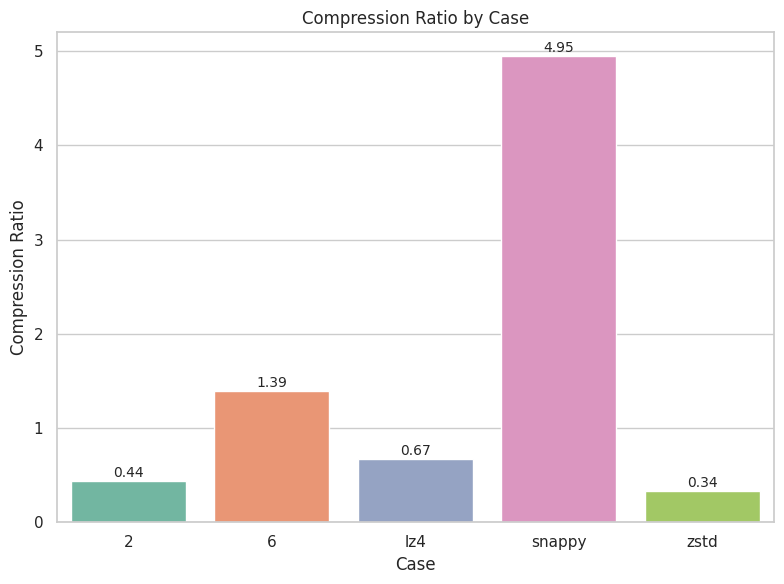

In [89]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='case', y='compression_ratio', data=df_read_avg, palette='Set2')

# 막대 위에 값 표기
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.01,
            f'{height:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Compression Ratio by Case')
plt.ylabel('Compression Ratio')
plt.xlabel('Case')
plt.tight_layout()
plt.show()